A comprehensive exploratory data analysis of your dataset, delving into aspects such as class balance, feature distributions, correlation analysis, and scrutiny of sensitive features.

In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


#reading file
file_path = 'default of credit card clients.xls'

# Read Excel file into a DataFrame
df = pd.read_excel(file_path)

X=df.drop(columns=['Unnamed: 0'])

# continue with preperation

#get list of feature names
feature_names= X.iloc[0].values
feature_names = np.array(feature_names)
X=X.drop(index=0)

y=df['Y']
y=y.drop(index=0)

y=pd.to_numeric(y)
y.head()
X = X[X['X3'] != 0]
X['X3'] = X['X3'].replace({5: 4, 6: 4})
X = X[X['X4'] != 0]
X['X4'] = X['X4'].replace({4:3,5: 3, 6: 3})
y = y[X.index]  # Update y to match the filtered rows in X
for column in X:
    X[column] = pd.to_numeric(X[column])
    X[column].head()


print(X)
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#
#sensitive_test = X_test['X2']



y.head()

           X1  X2  X3  X4  X5  X6  X7  X8  X9  X10  ...    X15    X16    X17  \
1       20000   2   2   1  24   2   2  -1  -1   -2  ...      0      0      0   
2      120000   2   2   2  26  -1   2   0   0    0  ...   3272   3455   3261   
3       90000   2   2   2  34   0   0   0   0    0  ...  14331  14948  15549   
4       50000   2   2   1  37   0   0   0   0    0  ...  28314  28959  29547   
5       50000   1   2   1  57  -1   0  -1   0    0  ...  20940  19146  19131   
...       ...  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...    ...    ...    ...   
29996  220000   1   3   1  39   0   0   0   0    0  ...  88004  31237  15980   
29997  150000   1   3   2  43  -1  -1  -1  -1    0  ...   8979   5190      0   
29998   30000   1   2   2  37   4   3   2  -1    0  ...  20878  20582  19357   
29999   80000   1   3   1  41   1  -1   0   0    0  ...  52774  11855  48944   
30000   50000   1   2   1  46   0   0   0   0    0  ...  36535  32428  15313   

         X18    X19    X20   X21    X22

1    1
2    1
3    0
4    0
5    0
Name: Y, dtype: int64

In [11]:
#Exploration of the data set
X.info()
#Number of columns and rows
X.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29932 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      29932 non-null  int64
 1   X2      29932 non-null  int64
 2   X3      29932 non-null  int64
 3   X4      29932 non-null  int64
 4   X5      29932 non-null  int64
 5   X6      29932 non-null  int64
 6   X7      29932 non-null  int64
 7   X8      29932 non-null  int64
 8   X9      29932 non-null  int64
 9   X10     29932 non-null  int64
 10  X11     29932 non-null  int64
 11  X12     29932 non-null  int64
 12  X13     29932 non-null  int64
 13  X14     29932 non-null  int64
 14  X15     29932 non-null  int64
 15  X16     29932 non-null  int64
 16  X17     29932 non-null  int64
 17  X18     29932 non-null  int64
 18  X19     29932 non-null  int64
 19  X20     29932 non-null  int64
 20  X21     29932 non-null  int64
 21  X22     29932 non-null  int64
 22  X23     29932 non-null  int64
 23  Y       299

(29932, 24)

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      0
dtype: int64


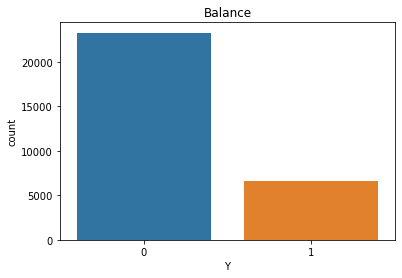

In [13]:
#Check for any missing values
missing_values = X.isnull().sum()
print(missing_values)

#Check for imbalance of the target variable Y
sns.countplot(data=X, x='Y')
plt.title("Balance")
plt.show()

feature distribution plots for all features

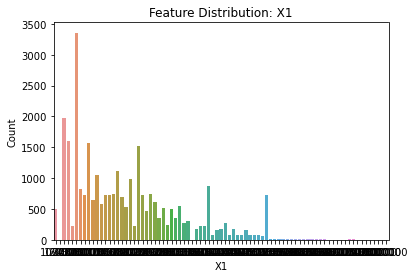

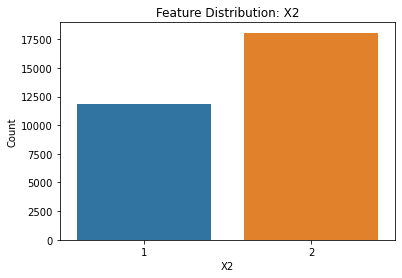

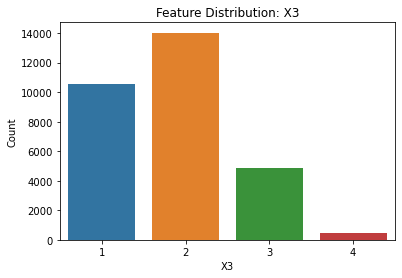

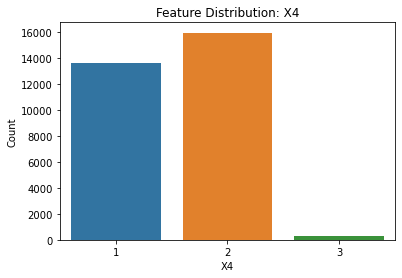

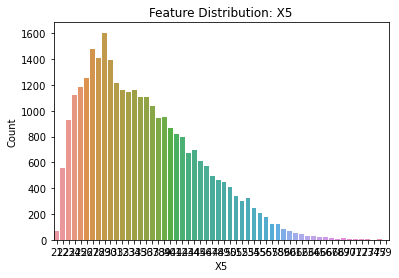

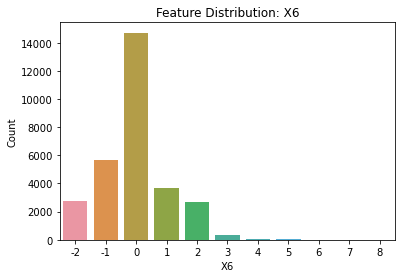

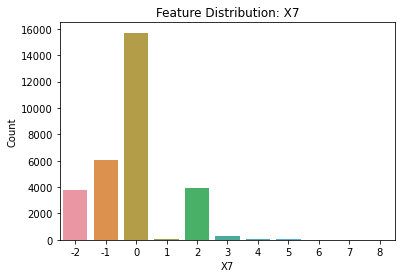

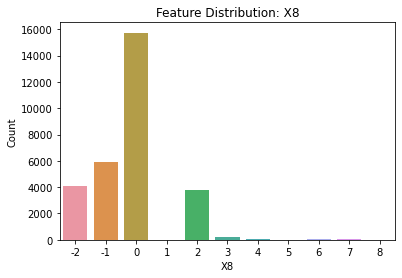

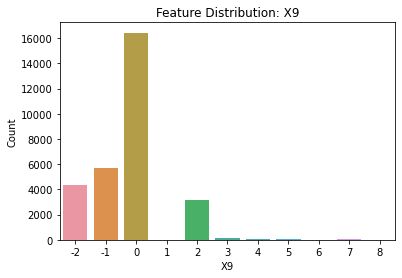

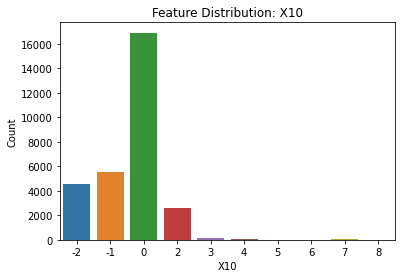

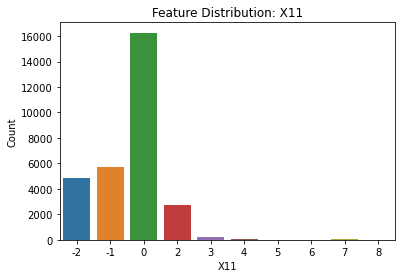

In [ ]:
for column in X.columns:
    sns.countplot(x=column, data=X)
    # Set title and labels
    plt.title(f'Feature Distribution: {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    # Show the plot
    plt.show()

correlation matrix for all features

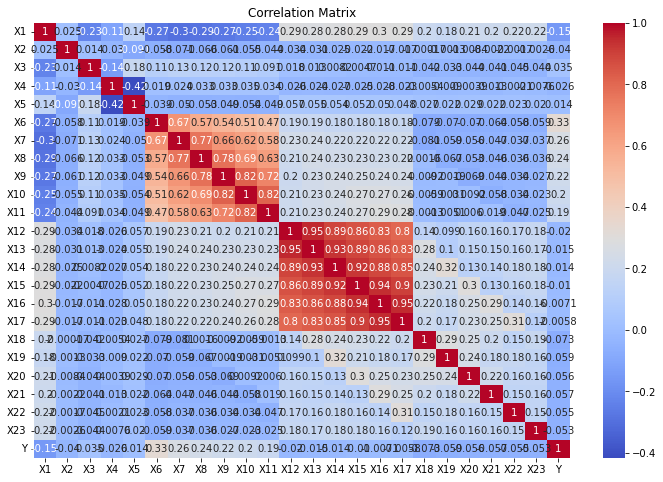

In [7]:
#Drop line with description
import seaborn as sns

correlation_matrix = X.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()